In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Fraud_check (1).csv to Fraud_check (1).csv


In [ ]:
fraud=pd.read_csv('Fraud_check (1).csv')
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [ ]:
fraud.info()
#No null value in  the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [ ]:
#We will create numerical variable for categorical data
label_encoder = preprocessing.LabelEncoder()
fraud['Undergrad']= label_encoder.fit_transform(fraud['Undergrad'])
fraud['Marital.Status']= label_encoder.fit_transform(fraud['Marital.Status'])
fraud['Urban']= label_encoder.fit_transform(fraud['Urban'])

In [ ]:
#We will take high sales above at 7.49 beacause it is the average of sales
fraud["Taxable.Income"]=(fraud["Taxable.Income"]>30000)*1

In [ ]:
#We will create the independent and dependent variable
x=fraud.drop(axis=0,columns="Taxable.Income")
y=fraud["Taxable.Income"]

In [ ]:
#Our output variable is imblance
fraud["Taxable.Income"].value_counts()

1    476
0    124
Name: Taxable.Income, dtype: int64

<ipython-input-10-ffbb80055713>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fraud["City.Population"])


<Axes: xlabel='City.Population', ylabel='Density'>

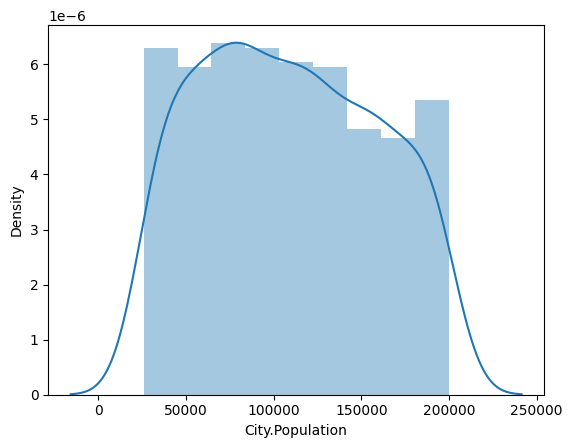

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(fraud["City.Population"])

<BarContainer object of 600 artists>

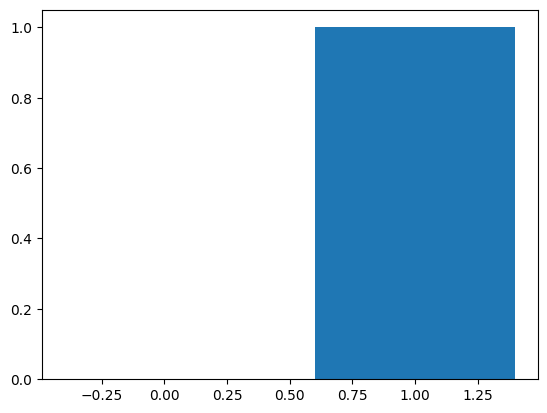

In [ ]:
plt.bar(y,y.values)

In [ ]:
#Now we will create random forest classification model1 with our train data
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [ ]:
model1 = RandomForestClassifier(n_estimators=100,max_depth=10,min_samples_split=20,criterion='gini')

In [ ]:
model1.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=20)

In [ ]:
from sklearn import metrics

In [ ]:
Y_pred=model1.predict(x_train)

In [ ]:
print("accuracy:",metrics.accuracy_score(y_train,Y_pred))

accuracy: 0.8142857142857143


In [ ]:
y_pred=model1.predict(x_test)

In [ ]:
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.75


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm= confusion_matrix(y_test, y_pred)
cm

array([[  0,  45],
       [  0, 135]])

Text(0.5, 1.0, 'Accuracy Score: 0.75')

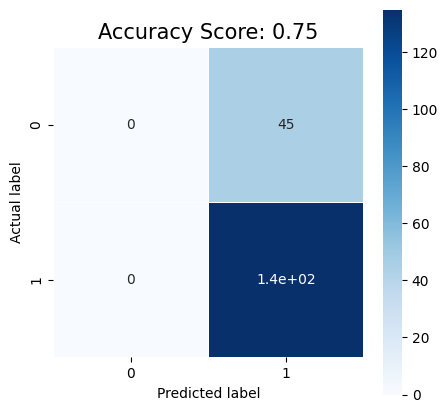

In [ ]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(model1.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

In [ ]:
# Predicting the values of test data
y_pred = model1.predict(x_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        45
           1       0.75      1.00      0.86       135

    accuracy                           0.75       180
   macro avg       0.38      0.50      0.43       180
weighted avg       0.56      0.75      0.64       180



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
##We will apply cross validatation technique & create the model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
#We will create the model applying the adaboost technique
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
#Accuracy of model2
num_trees = 10
kfold = KFold(n_splits=10)
model2 = AdaBoostClassifier(n_estimators=num_trees, random_state=12)
results = cross_val_score(model1, x, y, cv=kfold)
print(results.mean())

0.7933333333333332


In [ ]:
model2.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=10, random_state=12)

In [ ]:
from sklearn import metrics

In [ ]:
Y_pred=model2.predict(x_train)

In [ ]:
print("accuracy:",metrics.accuracy_score(y_train,Y_pred))

accuracy: 0.8166666666666667


In [ ]:
y_pred=model2.predict(x_test)

In [ ]:
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.7444444444444445


In [ ]:
cm= confusion_matrix(y_test, y_pred)
cm

array([[  0,  45],
       [  1, 134]])

In [ ]:
##We will create the model applying the baggingclassifier technique & evaluate accuracy of model2
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
kfold = KFold(n_splits=10)
cart = DecisionTreeClassifier()
num_trees =70
model3 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=42)
results = cross_val_score(model3, x, y, cv=kfold)
print(results.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

0.7283333333333333


In [ ]:
model3.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=70,
                  random_state=42)

In [ ]:
Y_pred=model3.predict(x_train)

In [ ]:
print("accuracy:",metrics.accuracy_score(y_train,Y_pred))

accuracy: 1.0


In [ ]:
y_pred=model3.predict(x_test)

In [ ]:
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.7166666666666667


In [ ]:
cm= confusion_matrix(y_test, y_pred)
cm

array([[  4,  41],
       [ 10, 125]])

In [ ]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [ ]:
kfold = KFold(n_splits=10)

# create the sub models
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, x_train, y_train, cv=kfold)
print(results.mean())

0.8119047619047619


In [ ]:
ensemble.fit(x_train,y_train)

VotingClassifier(estimators=[('logistic', LogisticRegression(max_iter=500)),
                             ('cart', DecisionTreeClassifier()),
                             ('svm', SVC())])

In [ ]:
Y_pred=ensemble.predict(x_test)

In [ ]:
print("accuracy:",metrics.accuracy_score(y_test,Y_pred))

accuracy: 0.75


In [ ]:
y_pred=ensemble.predict(x_train)